In [45]:
ls ../runs/new-data-runs-1/runtime_models

AGSO_model.pkl         NGA_model.txt          SIO_model.pkl
AGSO_model.txt         NGDC_model.pkl         SIO_model.txt
JAMSTEC_model.pkl      NGDC_model.txt         US_multi_model.pkl
JAMSTEC_model.txt      NOAA_geodas_model.pkl  US_multi_model.txt
NGA_model.pkl          NOAA_geodas_model.txt  small/


In [46]:
features = '''00 lon                                	143.92639
01 lat                                	-43.99727
02 depth                              	-4637
03 pred                               	-4633
04 (pred-depth)/depth                 	0.000862627
05 d10                                	0.984607124262
06 d20                                	0.972010395656
07 d60                                	0.953167490781
08 age                                	39.3518032149
09 VGG                                	20.9209685261
10 rate                               	1773.1538453
11 sed                                	1002.69584759
12 roughness                          	23.1643450107
13 G:T                                	0.58473963179
14 NDP2.5m                            	352.591278239
15 NDP5m                              	1227.86403676
16 NDP10m                             	4867.36187959
17 NDP30m                             	28191.8030442
18 STD2.5m                            	22.2740933357
19 STD5m                              	42.2348361999
20 STD10m                             	86.5628813895
21 STD30m                             	188.407867174
22 MED2.5m                            	-17.3113
23 MED5m                              	-30.9435
24 MED10m                             	-0.9137
25 MED30m                             	1.9221
26 D-MED2.5m/STD2.5m                  	-0.777193
27 D-MED5m/STD5m                      	-0.732653
28 D-MED10m/STD10m                    	-0.0105553
29 D-MED30m/STD30m                    	0.0102018
30 year                               	2000
31 kind                               	G'''.split('\n')
features = [s.split()[1] for s in features]

In [47]:
%matplotlib inline

import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

base_path = "../runs/new-data-runs-1"
model_path = os.path.join(base_path, "runtime_models")
models = [os.path.join(model_path, filename) for filename in os.listdir(model_path)
          if filename.endswith("pkl")]

# Importance measured by gain

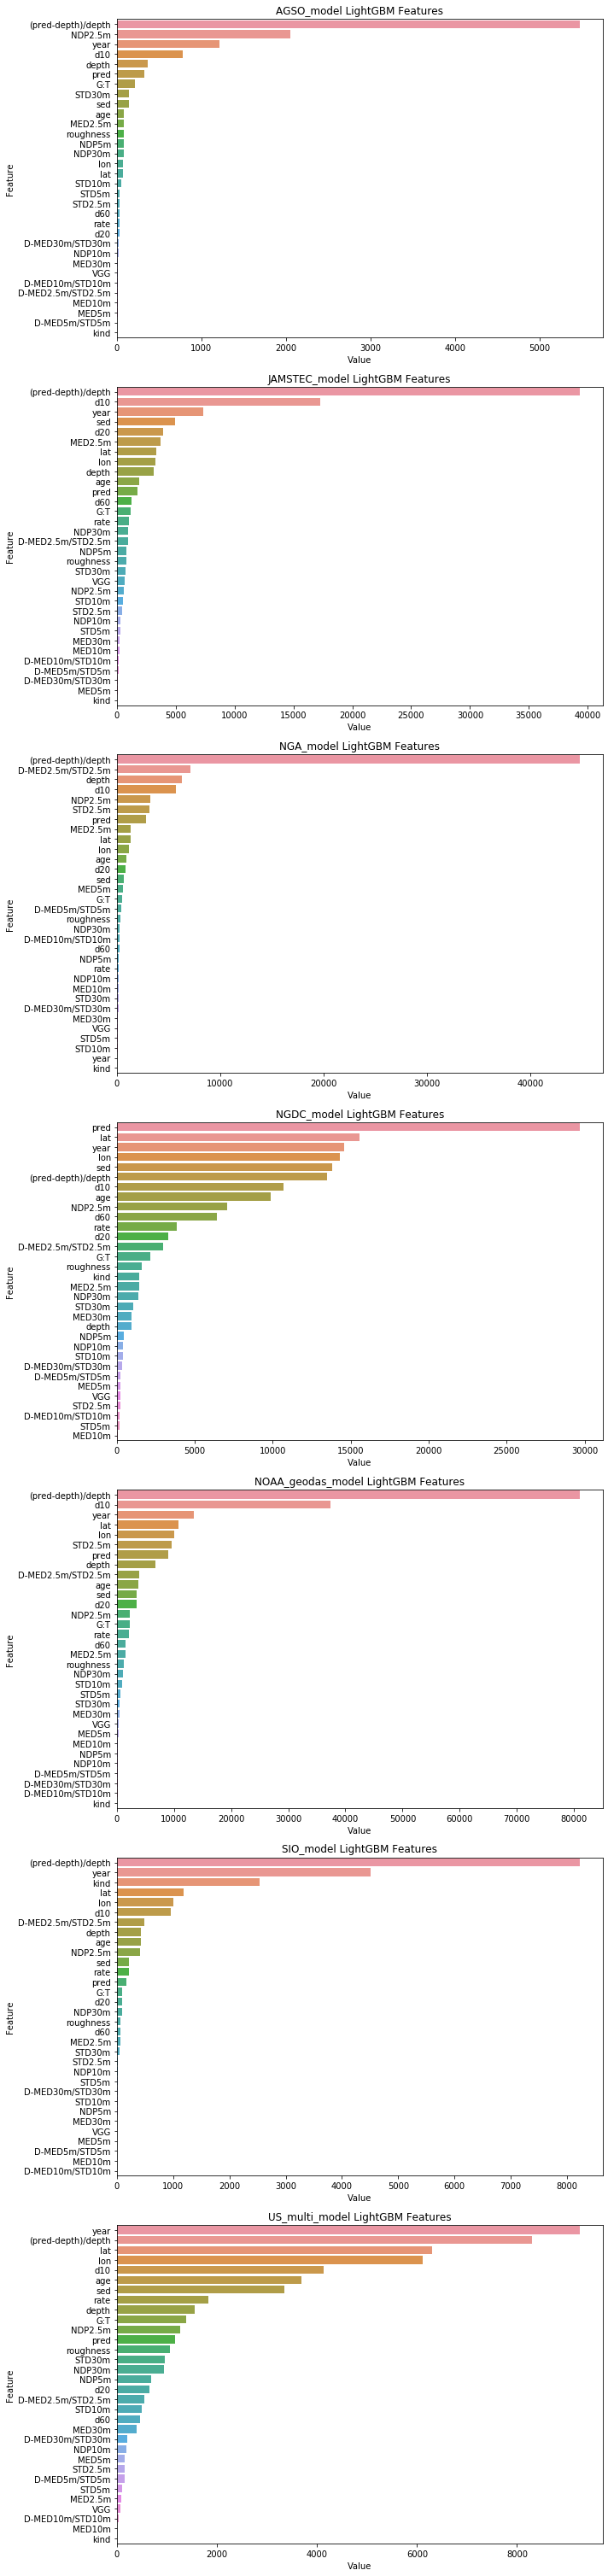

In [96]:
all_feature_imp = []
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='gain'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)
    feature_imp["agency"] = model_name.rsplit('_', 1)[0]
    all_feature_imp.append(feature_imp)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()

In [97]:
pd.concat(all_feature_imp)[["agency", "Feature", "Value"]].to_csv("feature_imp_gain.csv", sep=' ', index=False)

# Importance measured by the number of splits

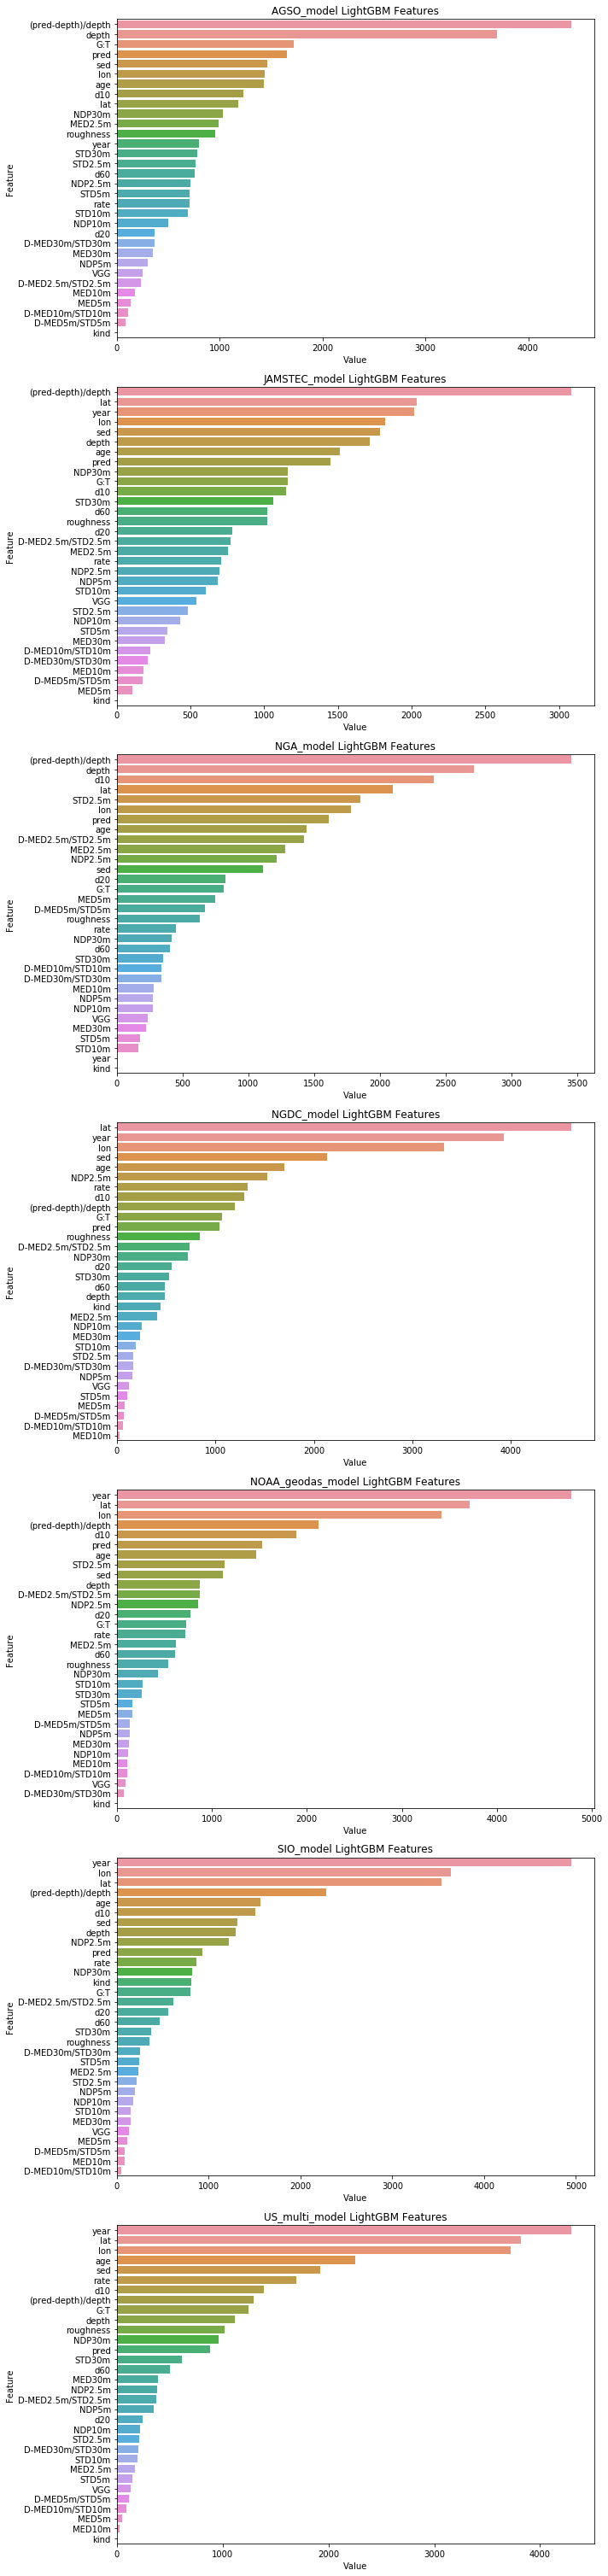

In [98]:
fig, ax = plt.subplots(len(models), 1, figsize=(10, 6 * len(models)))

for ax, model_path in zip(ax, models):
    model_name = os.path.basename(model_path).split(".")[0]
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    imp = sorted(zip(model.feature_importance(importance_type='split'),features))
    feature_imp = pd.DataFrame(imp, columns=['Value','Feature']) \
                    .sort_values(by="Value", ascending=False)

    sns.barplot(x="Value", y="Feature", data=feature_imp, ax=ax)
    ax.set_title('{} LightGBM Features'.format(model_name))

fig.tight_layout()